# Analysis of #draintheswamp on Twitter

Data collection: scraped tweets containing '#draintheswamp' and 'drain the swamp' using the Twitter Search API in a timeframe from 26th of October to November 7th.
Data analysis: The tweets are analysed using mainly pandas and ---. We were particularly interested in spotting UK ingerence of the hashtag.

In [68]:
import ast
import pandas as pd
import datetime
import collections
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('fivethirtyeight')

df0 = pd.read_csv('NewDrainTheSwamp.csv',encoding='utf-8', engine='python')
df1 = pd.read_csv('NewDrainTheSwamp1.csv',encoding='utf-8', engine='python')
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.options.display.max_colwidth = 100

In [69]:
df0.shape

(50003, 14)

In [70]:
df1.shape

(50922, 14)

In [71]:
df = pd.concat([df0, df1])
df = df.drop_duplicates(["tweet_id"], keep = 'first')
df.shape

(99683, 14)

### Calculate a dateframe

In [45]:
#df['account_creation_date'] = pd.to_datetime(df['account_creation_date']).apply(lambda x: x.strftime('%d-%m-%Y'))

### Calculating the top hashtags in the users description

In [72]:
import re
df['hashtags_user_descriptions'] = df['user_description'].apply(lambda x: str(re.findall(r"#(\w+)", str(x))))
df['hashtags_user_descriptions'] = df['hashtags_user_descriptions'].apply(lambda x: ast.literal_eval(x))
type(df.iloc[0].hashtags_user_descriptions)

list

In [73]:
df['hashtags_user_descriptions'] = [str(i).lower() for i in df['hashtags_user_descriptions']]
df.head(5)

,created_at,tweet_id,tweet_text,screen_name,name,account_creation_date,location,user_description,original_tweet_text,original_tweet_user_screen_name,original_tweet_user_location,original_tweet_user_description,original_tweet_user_created_at,original_user_account_created_at,hashtags_user_descriptions
0,2019-11-27 12:02:05,1199659656676818944,RT @Brooke_Kelly87: Calling All Patriots To Unite Together Below. 🇺🇸 No Ticket Required All MAGA...,Wvwalker1,WVwalker,Mon Oct 01 20:44:33 +0000 2018,"West Virginia, USA",Conservative country guy. Trump Supporter 2A Supporter. AMERICA 1St. \nMarried. Dad of 2. P...,Calling All Patriots To Unite Together Below. 🇺🇸 No Ticket Required All MAGA’S Welcome. Simply C...,Brooke_Kelly87,"Knoxville, TN",🇺🇸KEEP AMERICA GREAT 2020🇺🇸 #GOD #Jesus #ProLife #Military #ProGuns #Deplorable #ProAmerican,2019-11-27 10:25:45,2019-06-22 05:41:37,[]
1,2019-11-27 12:02:01,1199659638280601600,"RT @TrumpWarRoom: Hunter Biden had zero experience in the energy sector, but he was paid million...",Angelmdunn1961,Angel Dunn,Sat Mar 12 01:02:48 +0000 2016,"Fort Lauderdale, FL",NaN,"Hunter Biden had zero experience in the energy sector, but he was paid millions by a corrupt Ukr...",TrumpWarRoom,MAGA Country,"Highlighting @realDonaldTrump's #PromisesKept, fighting #FakeNews. This account punches back 10x...",2019-11-27 01:25:34,2019-03-20 20:54:58,[]
2,2019-11-27 12:01:59,1199659633243234304,RT @Brooke_Kelly87: Calling All Patriots To Unite Together Below. 🇺🇸 No Ticket Required All MAGA...,Carolyn_4_Vets,Patriots Stand United‼️QAnon,Thu Jun 22 21:38:12 +0000 2017,"Alabama, Heart of Dixie",John 3:16 #TRUMP Trump is our hope for the future! 🙏 Drain the swamp!\n#VETS #WWG1WGA #MAGA FB👉@...,Calling All Patriots To Unite Together Below. 🇺🇸 No Ticket Required All MAGA’S Welcome. Simply C...,Brooke_Kelly87,"Knoxville, TN",🇺🇸KEEP AMERICA GREAT 2020🇺🇸 #GOD #Jesus #ProLife #Military #ProGuns #Deplorable #ProAmerican,2019-11-27 10:25:45,2019-06-22 05:41:37,"['trump', 'vets', 'wwg1wga', 'maga', 'maga']"
3,2019-11-27 12:01:49,1199659587965771782,"RT @TrumpWarRoom: Hunter Biden had zero experience in the energy sector, but he was paid million...",jacktunney6,jack tunney,Tue Aug 14 20:19:00 +0000 2018,NaN,NaN,"Hunter Biden had zero experience in the energy sector, but he was paid millions by a corrupt Ukr...",TrumpWarRoom,MAGA Country,"Highlighting @realDonaldTrump's #PromisesKept, fighting #FakeNews. This account punches back 10x...",2019-11-27 01:25:34,2019-03-20 20:54:58,[]
4,2019-11-27 12:01:40,1199659553958367232,"RT @TrumpWarRoom: Hunter Biden had zero experience in the energy sector, but he was paid million...",councilman_ben,Ben Goldberg,Wed Jun 26 12:25:51 +0000 2013,"Long Beach, CA",NaN,"Hunter Biden had zero experience in the energy sector, but he was paid millions by a corrupt Ukr...",TrumpWarRoom,MAGA Country,"Highlighting @realDonaldTrump's #PromisesKept, fighting #FakeNews. This account punches back 10x...",2019-11-27 01:25:34,2019-03-20 20:54:58,[]


In [74]:
def hashing(col):
    col = col.apply(lambda x: ast.literal_eval(x))
    
    def mapper(s):
        all_vals = list()

        for l in s:
            [all_vals.append(x) for x in l]

        all_vals.sort()
        return all_vals

    def reducer(l):
        all_counts = dict()
        prev = l[0]
        count = 0

        for x in l:
            if x == prev:
                count = count + 1
            else:
                all_counts[prev] = count
                prev = x
                count = 1      

        all_counts[prev] = count

        return all_counts
    
    mapped = mapper(col)
    reduced = reducer(mapped)
    reduced = dict(sorted(reduced.items(), key=lambda x: x[1], reverse=True))
    
    df = pd.DataFrame(list(reduced.items()), columns=['hashtags_user_descriptions', 'number']).head(150).sort_values('number', ascending=False)
    return df

In [75]:
tags1 = hashing(df.hashtags_user_descriptions)
tags1

,hashtags_user_descriptions,number
0,maga,22292
1,kag,10276
2,trump2020,6894
3,wwg1wga,6157
4,2a,4707
5,qanon,3115
6,nra,2895
7,patriot,2435
8,buildthewall,2422
9,kag2020,2281


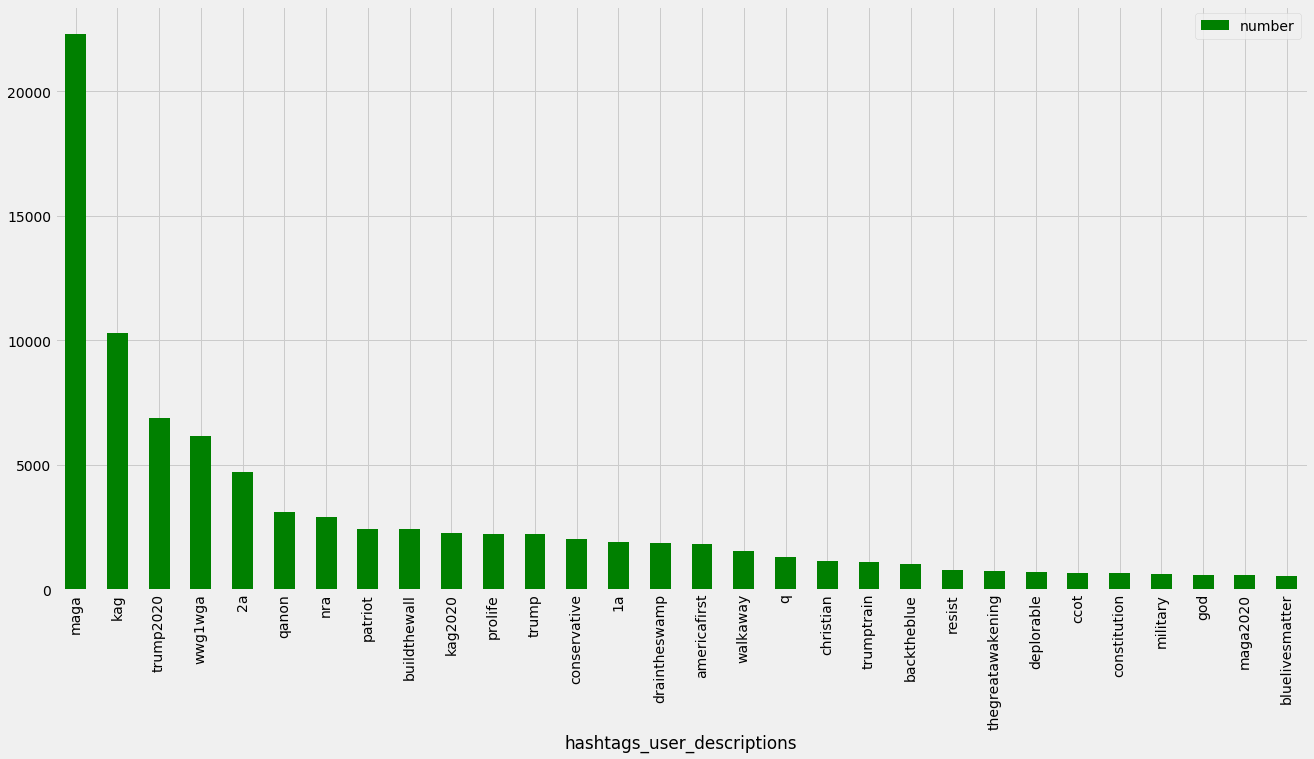

In [76]:
tags1 = hashing(df.hashtags_user_descriptions).head(30).plot(kind='bar',x='hashtags_user_descriptions',y='number', color ='green', figsize=(20,10))

# Calculating the top hashtags in the tweet text

In [77]:
df['hashtags_tweet_text'] = df['tweet_text'].apply(lambda x: str(re.findall(r"#(\w+)", str(x))))
df['hashtags_tweet_text'] = df['hashtags_tweet_text'].apply(lambda x: ast.literal_eval(x))
type(df.iloc[0].hashtags_tweet_text)

list

In [78]:
df['hashtags_tweet_text'] = [str(i).lower() for i in df['hashtags_tweet_text']]
df.shape[0]

99683

In [79]:
df['hashtags_tweet_text'].value_counts().head(10)
type(df.iloc[0].hashtags_tweet_text)

str

In [80]:
def hashing(col):
    
    col = col.apply(lambda x: ast.literal_eval(x))
    
    def mapper(s):
        all_vals = list()

        for l in s:
            [all_vals.append(x) for x in l]

        all_vals.sort()
        return all_vals

    def reducer(l):
        all_counts = dict()
        prev = l[0]
        count = 0

        for x in l:
            if x == prev:
                count = count + 1
            else:
                all_counts[prev] = count
                prev = x
                count = 1      

        all_counts[prev] = count

        return all_counts
    
    mapped = mapper(col)
    reduced = reducer(mapped)
    reduced = dict(sorted(reduced.items(), key=lambda x: x[1], reverse=True))
    
    df = pd.DataFrame(list(reduced.items()), columns=['hashtags_tweet_text', 'number']).head(150).sort_values('number', ascending=False)
    return df

In [81]:
tags2 = hashing(df.hashtags_tweet_text)
tags2

,hashtags_tweet_text,number
0,draintheswamp,17087
1,spiritcooking,6021
2,neveryhillary,5980
3,maga,2038
4,qanon,1901
5,wwg1wga,1231
6,trum,1179
7,libs,1177
8,trump2020,1047
9,fakeimpeachmenthoax,925


# Filter by UK keywords

In [82]:
british_tags =['brexit', 'generalelection19', 'boris', 'britishindependence', 'brexitblocking', 'leavers','ge19',
               'ge2019', 'backboris', 'remainer', 'standup4brexit', 'leavemeansleave', 'brexitparty_uk', 'brexliblab',
               'voteconservative2019', 'labour', 'ditchlabour', 'nevercorbyn', 'british']

In [84]:
def code_tags_text(row):
    a_set = set(british_tags)
    b_set = set(row['hashtags_tweet_text'])
    if (a_set & b_set):
        return 1
    else: 
        return 0

In [85]:
df['hashtags_tweet_text'] = df['hashtags_tweet_text'].apply(lambda x: ast.literal_eval(x))

df['british_tags_in_text'] = df.apply(code_tags_text, axis=1)

type(df.iloc[0].hashtags_tweet_text)

list

In [86]:
df.british_tags_in_text.unique()

array([0, 1])

In [87]:
def code_tags_text(row):
    a_set = set(british_tags)
    b_set = set(row['hashtags_user_descriptions'])
    if (a_set & b_set):
        return 1
    else: 
        return 0

In [88]:
df['hashtags_user_descriptions'] = df['hashtags_user_descriptions'].apply(lambda x: ast.literal_eval(x))

df['british_tags_in_description'] = df.apply(code_tags_text, axis=1)

type(df.iloc[0].hashtags_user_descriptions)

list

In [89]:
df.british_tags_in_description.unique()

array([0, 1])

In [90]:
df = df[(df.british_tags_in_text == 1)| (df.british_tags_in_description == 1)]
df.shape

(520, 18)

In [91]:
df.to_csv('newdata.csv')

### Analyse of the sample

1. First on the language used: most used hashtags and keywords
2. Which are the accounts tweeting the most?
3. Which is the avarage number of followers>
4. Analyse

In [124]:
df1 = pd.read_csv('newdata.csv',encoding='utf-8', engine='python')

In [125]:
df0 = pd.read_csv('newdata0.csv', encoding='utf-8', engine='python')
df = pd.concat([df0, df1])

In [126]:
df.shape

(4319, 19)

In [127]:
df['hashtags_tweet_text'] = df['tweet_text'].apply(lambda x: str(re.findall(r"#(\w+)", str(x))))
df['hashtags_tweet_text'] = df['hashtags_tweet_text'].apply(lambda x: ast.literal_eval(x))
type(df.iloc[0].hashtags_tweet_text)

list

In [128]:
df['hashtags_tweet_text'] = [str(i).lower() for i in df['hashtags_tweet_text']]
df.shape[0]

4319

In [129]:
def hashing(col):
    
    col = col.apply(lambda x: ast.literal_eval(x))
    
    def mapper(s):
        all_vals = list()

        for l in s:
            [all_vals.append(x) for x in l]

        all_vals.sort()
        return all_vals

    def reducer(l):
        all_counts = dict()
        prev = l[0]
        count = 0

        for x in l:
            if x == prev:
                count = count + 1
            else:
                all_counts[prev] = count
                prev = x
                count = 1      

        all_counts[prev] = count

        return all_counts
    
    mapped = mapper(col)
    reduced = reducer(mapped)
    reduced = dict(sorted(reduced.items(), key=lambda x: x[1], reverse=True))
    
    df = pd.DataFrame(list(reduced.items()), columns=['hashtags_tweet_text', 'number']).head(150).sort_values('number', ascending=False)
    return df

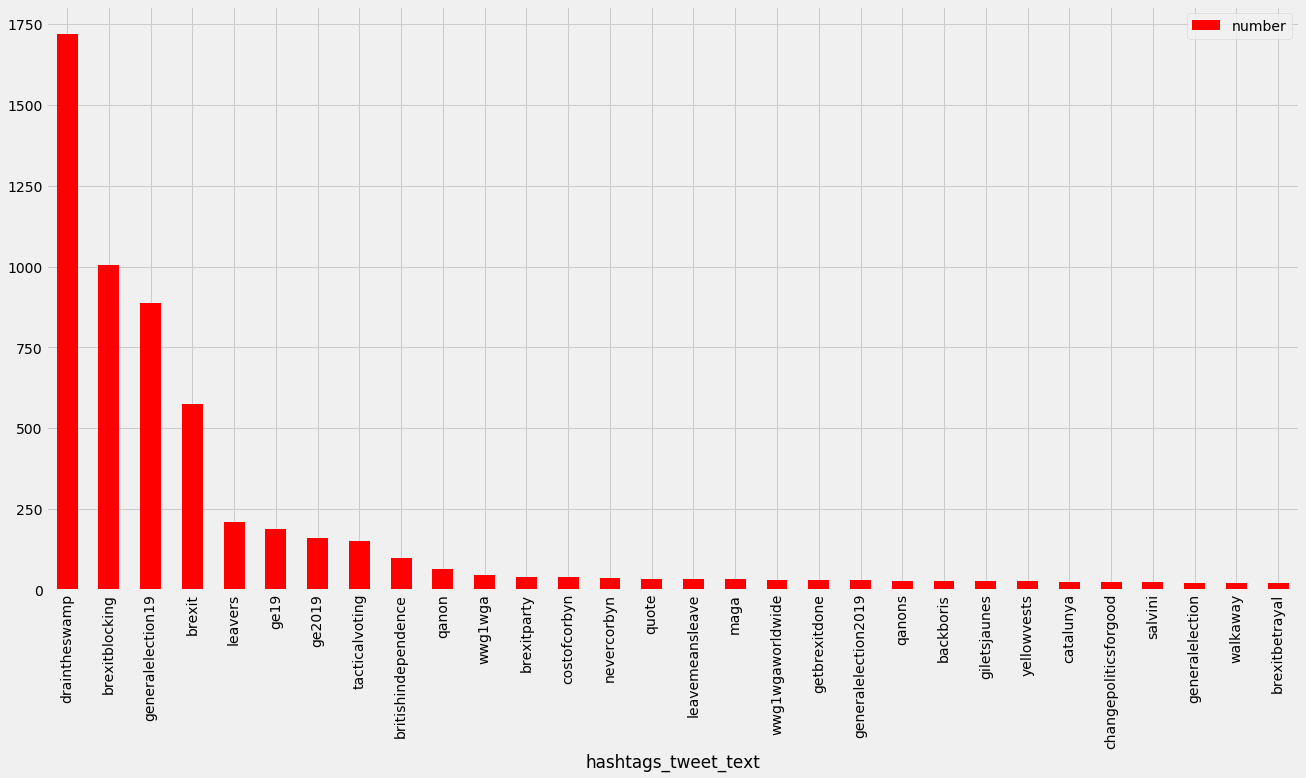

In [130]:
tags2 = hashing(df.hashtags_tweet_text).head(30).plot(kind='bar',x='hashtags_tweet_text',y='number', color ='red',figsize=(20,10))

In [131]:
df_new = df[df['tweet_text'].notnull()]

In [141]:
df['screen_name'].value_counts().head(50)

DebraMMason1       40
gooner1jdc         35
HoneyFitz93        33
dyannpaget         25
GodspeedQQ         25
SukhSin12130293    25
UnionJack123       22
euspring2016       20
2tweetaboutit      19
AnonymousJourn9    18
William33091103    18
graham240760       15
jenninemorgan      14
SteveEm75450689    14
Brexitistheonl1    14
JohnRobertWho      13
Bill_the_Bear      13
quelineruby64      12
RayBaresi          12
GrumpySir          12
ambulance_man      12
UKBadDog1          11
paceless           11
PattyPatriotCA     11
LimeSwamp          11
jungman0073        11
ProfSnagger        10
FIGHTEXTREMISTS    10
pam30301           10
Makerel_Sky        10
respecttherefe1     9
007cigarjoe         9
garyjhedley         9
Shaz_Barnett        9
Kirbyramasenju      9
karenlondon9930     9
KidukSong           9
Melanie36427738     9
cromwel14978365     9
WendyPuerto         9
realpetebennett     9
AAE49               8
ChrisCull55         8
Hadigee1            8
FaisalBongobong     8
CrypticPsy

In [149]:
df['tweet_text'].value_counts().head(50)
                                  

RT @SuzanneEvans1: Is there a better example of what a pathetic, bitter and twisted business politics is, than seeing the #BrexitBlocking n…                  1004
RT @UnionJack123: RETWEET IF U WANT LAMMY TO LOSE HIS SEAT #DrainTheSwamp #GeneralElection19                                                                   730
RT @MrAhmadKMalik: Astonished at the number of #Leavers who think Boris will deliver #Brexit\n\nBoth @Conservatives &amp; @UKLabour over the deca…             207
RT @Emmalouisajones: I hope this is true. #TacticalVoting on 12/12 is a must to boost leave representation in the HoC.\n#GE19 #DrainTheSwamp…                  146
RT @Brooke_Kelly87: Calling All Patriots To Unite Together Below. 🇺🇸 No Ticket Required All MAGA’S Welcome. Simply Comment Below Retweet &amp;…                 95
RT @DarrenPlymouth: "It's more than just #Brexit, it's a question of honesty" Royston Smith \n\n#GE2019, drain the swamp!\n\n https://t.co/c9bA…                67
RT @AnonymousJourn9: T

In [147]:
RT.to_csv('RT.csv')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [150]:
df_unique = df.drop_duplicates(['screen_name'], keep='first')
df_unique.shape[0]

2882

In [164]:
df_unique['location'].value_counts().head(10)

England, United Kingdom     129
United Kingdom               99
London, England              54
UK                           53
England                      42
London                       27
South East, England          25
North West, England          24
South West, England          20
Scotland, United Kingdom     18
Name: location, dtype: int64

In [170]:
df_unique['hashtags_user_descriptions'] = df_unique['user_description'].apply(lambda x: str(re.findall(r"#(\w+)", str(x))))
df_unique['new_hashtags_user_descriptions'] = df_unique['hashtags_user_descriptions'].apply(lambda x: ast.literal_eval(x))
type(df_unique.iloc[0].hashtags_user_descriptions)

str

In [172]:
df_unique['british_tags_in_description'].value_counts().head()

0    2256
1     626
Name: british_tags_in_description, dtype: int64

In [ ]:
def hashing(col):
    col = col.apply(lambda x: ast.literal_eval(x))
    
    def mapper(s):
        all_vals = list()

        for l in s:
            [all_vals.append(x) for x in l]

        all_vals.sort()
        return all_vals

    def reducer(l):
        all_counts = dict()
        prev = l[0]
        count = 0

        for x in l:
            if x == prev:
                count = count + 1
            else:
                all_counts[prev] = count
                prev = x
                count = 1      

        all_counts[prev] = count

        return all_counts
    
    mapped = mapper(col)
    reduced = reducer(mapped)
    reduced = dict(sorted(reduced.items(), key=lambda x: x[1], reverse=True))
    
    df_unique = pd.DataFrame(list(reduced.items()), columns=['df_unique_hashtags_user_descriptions', 'number']).head(150).sort_values('number', ascending=False)
    return df_unique

In [ ]:
tags2 = hashing(df_unique.df_unique_hashtags_user_descriptions)
tags2

# NLP analysis

In [151]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/carlotta/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/carlotta/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [152]:
def parsing(row):
    text = re.sub('[^a-zA-Z]', ' ', str(row['tweet_text']))
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    return text

df['tweet_text'] = df.apply(parsing, axis=1)

In [153]:
freq = pd.Series(' '.join(df['tweet_text']).split()).value_counts()[:20]
freq

rt               3474
the              3154
is               2808
a                2752
to               1788
of               1746
draintheswamp    1719
and              1407
t                1204
what             1121
than             1100
there            1073
better           1033
n                1032
politics         1019
seeing           1007
co               1007
business         1007
example          1006
https            1006
dtype: int64

In [154]:
df.shape[0]
stop_words = set(stopwords.words("english"))
new_words = ["using", "show", "result", "large", "also", "iv", "one", "two", "new", "previously", "shown", "www", "com", "http", "twitter", "the", "all"]
stop_words = stop_words.union(new_words)

In [155]:
df = df.reset_index(drop=True)

In [156]:
corpus = []
for i in range(0, 300):
    text = df['user_description'][i]
    
#     ##Convert to list from string
    text = text.split()
    if "#" in text:
        text.replace("#", "")
    
#     ##Stemming
    ps=PorterStemmer()
#     #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in stop_words] 
    text = " ".join(text)
    corpus.append(text)

AttributeError: 'float' object has no attribute 'split'

In [157]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stop_words,
                          max_words=100,
                          max_font_size=100, 
                          random_state=42
                         ).generate(str(corpus))
print(wordcloud)
fig = plt.figure(1)
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

ModuleNotFoundError: No module named 'wordcloud'

[Text(0, 0, 'brexit'),
 Text(0, 0, 'maga'),
 Text(0, 0, 'britishindependence'),
 Text(0, 0, 'the'),
 Text(0, 0, 'https'),
 Text(0, 0, 'co'),
 Text(0, 0, 'wwg1wga'),
 Text(0, 0, 'kag'),
 Text(0, 0, 'standup4brexit'),
 Text(0, 0, 'trump2020'),
 Text(0, 0, 'draintheswamp'),
 Text(0, 0, 'not'),
 Text(0, 0, '2a'),
 Text(0, 0, 'truth'),
 Text(0, 0, 'politics'),
 Text(0, 0, 'all'),
 Text(0, 0, 'no'),
 Text(0, 0, 'dm'),
 Text(0, 0, 'party'),
 Text(0, 0, 'britain')]

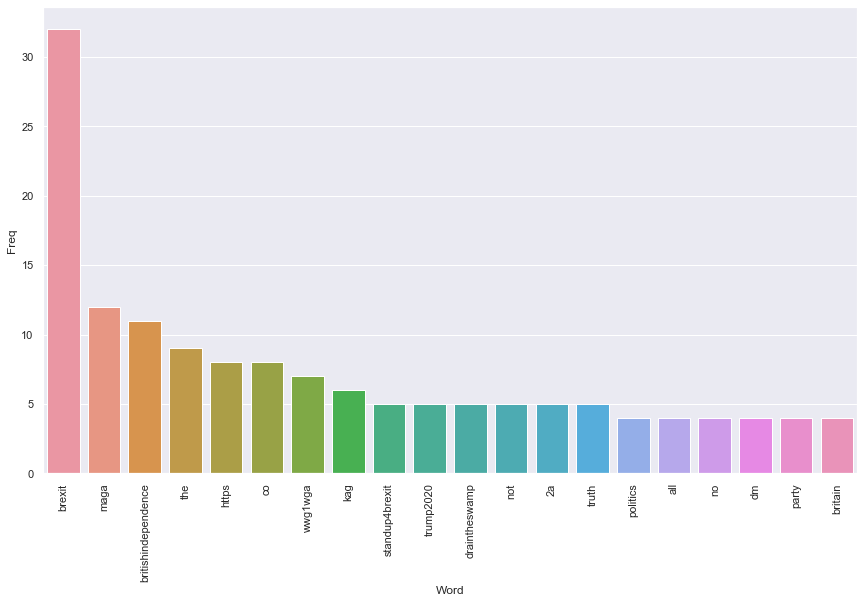

In [158]:
from sklearn.feature_extraction.text import CountVectorizer
import re
cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(corpus)

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]

#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]

#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

                               Bi-gram  Freq
0                             https co     8
1   britishindependence standup4brexit     4
2                         make britain     3
3                        britain great     3
4                          great again     3
5                             maga kag     3
6                                1a 2a     3
7                          brexit maga     3
8                           qanon maga     3
9                         maga assange     3
10                     assange wwg1wga     3
11                        wwg1wga joem     3
12                          joem small     3
13                           small bus     3
14                           bus owner     3
15                         owner https     3
16                       co djecw2dbo4     3
17                     djecw2dbo4 read     3
18                            read the     3
19                           the drops     3


[Text(0, 0, 'https co'),
 Text(0, 0, 'britishindependence standup4brexit'),
 Text(0, 0, 'make britain'),
 Text(0, 0, 'britain great'),
 Text(0, 0, 'great again'),
 Text(0, 0, 'maga kag'),
 Text(0, 0, '1a 2a'),
 Text(0, 0, 'brexit maga'),
 Text(0, 0, 'qanon maga'),
 Text(0, 0, 'maga assange'),
 Text(0, 0, 'assange wwg1wga'),
 Text(0, 0, 'wwg1wga joem'),
 Text(0, 0, 'joem small'),
 Text(0, 0, 'small bus'),
 Text(0, 0, 'bus owner'),
 Text(0, 0, 'owner https'),
 Text(0, 0, 'co djecw2dbo4'),
 Text(0, 0, 'djecw2dbo4 read'),
 Text(0, 0, 'read the'),
 Text(0, 0, 'the drops')]

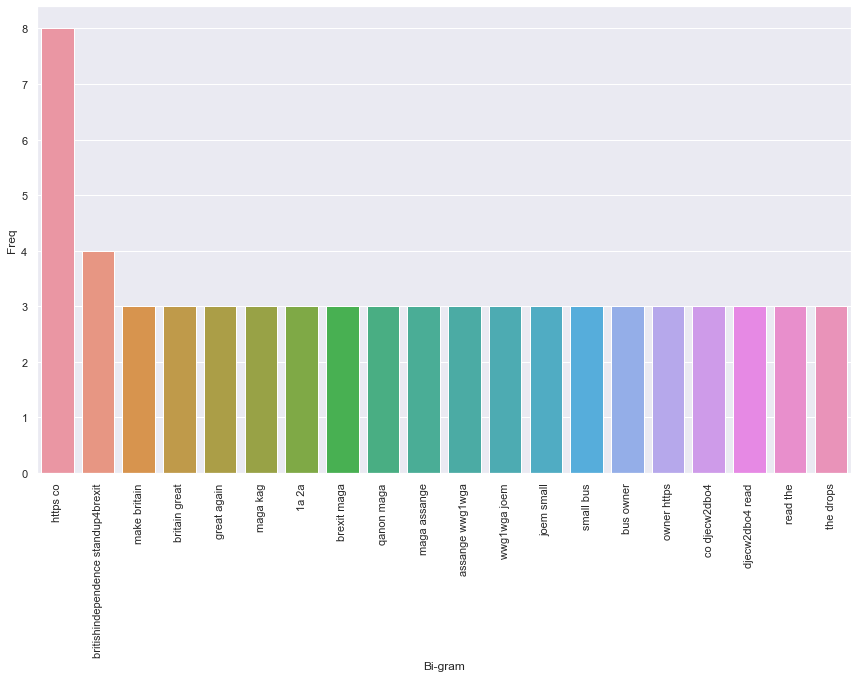

In [159]:
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

top2_words = get_top_n2_words(corpus, n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
print(top2_df)

#Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=90)

                    Tri-gram  Freq
0            maga brexit kag     2
1                maga nra 1a     2
2                  nra 1a 2a     2
3               1a 2a brexit     2
4                the will of     2
5              pro brexit no     2
6         hate farleft right     1
7   farleft right extremists     1
8        right extremists id     1
9     extremists id politics     1
10        id politics unjust     1
11    politics unjust labels     1
12          unjust labels pc     1
13            labels pc like     1
14            pc like policy     1
15         like policy facts     1
16         policy facts laws     1
17       facts laws patriots     1
18      laws patriots brexit     1
19   patriots brexit kag2020     1


[Text(0, 0, 'maga brexit kag'),
 Text(0, 0, 'maga nra 1a'),
 Text(0, 0, 'nra 1a 2a'),
 Text(0, 0, '1a 2a brexit'),
 Text(0, 0, 'the will of'),
 Text(0, 0, 'pro brexit no'),
 Text(0, 0, 'hate farleft right'),
 Text(0, 0, 'farleft right extremists'),
 Text(0, 0, 'right extremists id'),
 Text(0, 0, 'extremists id politics'),
 Text(0, 0, 'id politics unjust'),
 Text(0, 0, 'politics unjust labels'),
 Text(0, 0, 'unjust labels pc'),
 Text(0, 0, 'labels pc like'),
 Text(0, 0, 'pc like policy'),
 Text(0, 0, 'like policy facts'),
 Text(0, 0, 'policy facts laws'),
 Text(0, 0, 'facts laws patriots'),
 Text(0, 0, 'laws patriots brexit'),
 Text(0, 0, 'patriots brexit kag2020')]

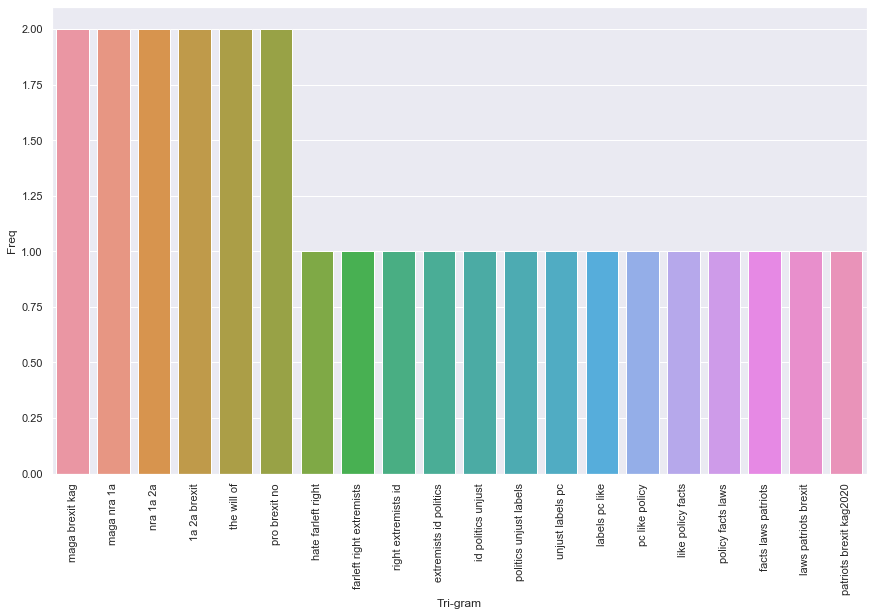

In [251]:
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

top3_words = get_top_n3_words(corpus, n=20)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
print(top3_df)

#Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=90)

### Accounts that were retweeting the most 

- top 10 accounts' tweeting level?

In [250]:
df['screen_name'].value_counts().head(20)

Andster05          1
krystynastark      1
allywally          1
copping_nicola     1
Dippi1103          1
alan_lingwood      1
ColinBonniface     1
starminer1965      1
Bobthepogle        1
NHSStaffNoDeal     1
viesvies1          1
day_one_noob       1
tm014d1009         1
ChristinaDonn11    1
NDSS20000          1
PetersonDott       1
Neil78218433       1
BrexitLondon       1
preventuer         1
outcast56115718    1
Name: screen_name, dtype: int64

In [ ]:
df['tweet_text'].value_counts().head(20)

In [ ]:
df['location'].value_counts().head(30).plot(kind='bar',x='location',y='number', color ='black')

In [ ]:
# new data frame with split value columns 
new = df["created_at"].str.split(" ", n = 1, expand = True) 
  
# making separate first name column from new data frame 
df["Date"]= new[0] 
  
# making separate last name column from new data frame 
df["Time"]= new[1] 

In [ ]:
df.tail()

In [ ]:
df.sort_values("Time", ascending=True).head()

In [ ]:
df.dtypes

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format="%d/%m/%Y")
df.head()

In [ ]:
df.dtypes

In [ ]:
df['screen_name'].value_counts().head(10)

In [ ]:
df['Time'] = pd.to_datetime(df['Time']).apply(lambda x: x.strftime('%H:%M'))
seconds = df.groupby('Time').Time.count()
ax = seconds.plot(figsize=(10, 5), color='red', linewidth=1.9, alpha=0.9)
ax.set_facecolor('xkcd:white')
ax.set_facecolor((white, white, white))
ax.patch.set_facecolor('xkcd:mint green')

In [ ]:
df.to_csv('seconds.csv', index = None, header=True)

In [ ]:
export_csv = seconds.to_csv('seconds.csv', index = None, header=True)

In [ ]:
def hashing(col):
    
    col = col.apply(lambda x: ast.literal_eval(x))
    
    def mapper(s):
        all_vals = list()

        for l in s:
            [all_vals.append(x) for x in l]

        all_vals.sort()
        return all_vals

    def reducer(l):
        all_counts = dict()
        prev = l[0]
        count = 0

        for x in l:
            if x == prev:
                count = count + 1
            else:
                all_counts[prev] = count
                prev = x
                count = 1      

        all_counts[prev] = count

        return all_counts
    
    mapped = mapper(col)
    reduced = reducer(mapped)
    reduced = dict(sorted(reduced.items(), key=lambda x: x[1], reverse=True))
    
    df = pd.DataFrame(list(reduced.items()), columns=['hashtags_user_descriptions', 'number']).head(50).sort_values('number', ascending=False)
    return df

In [ ]:
tags1 = hashing(df.hashtags_user_descriptions)
tags1
export_csv = tags1.to_csv('hash.csv', index = None, header=True)
    

In [ ]:
tags1 = hashing(df.hashtags_user_descriptions).head(30).plot(kind='bar',x='hashtags_user_descriptions',y='number', color ='green')

In [ ]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer

def parsing(row):
    text = re.sub('[^a-zA-Z]', ' ', str(row['user_description']))
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    return text

df['user_description'] = df.apply(parsing, axis=1)

In [ ]:
freq = pd.Series(' '.join(df['user_description']).split()).value_counts()[:20]
freq

In [ ]:
df.shape[0]
stop_words = set(stopwords.words("english"))
new_words = ["using", "show", "result", "large", "also", "iv", "one", "two", "new", "previously", "shown", "www", "com", "http", "twitter"]
stop_words = stop_words.union(new_words)

In [ ]:
df = df.reset_index(drop=True)

In [ ]:
corpus = []
for i in range(0, 300):
    text = df['user_description'][i]
    
    
#     ##Stemming
    ps=PorterStemmer()
#     #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in stop_words] 
    text = " ".join(text)
    corpus.append(text)

In [ ]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stop_words,
                          max_words=60,
                          max_font_size=100, 
                          random_state=42
                         ).generate(str(corpus))
print(wordcloud)
fig = plt.figure(1)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
df.head()

In [ ]:
df['account_creation_date'] = pd.to_datetime(df['account_creation_date']).apply(lambda x: x.strftime('%d-%m-%Y'))

In [ ]:
df['account_creation_date'] = pd.to_datetime(df['account_creation_date'])

In [ ]:
unique_feature = 'screen_name'
key = 'account_creation_date'
freq = 'w'

In [ ]:
# getting unique accounts
unique_accts = df.drop_duplicates(subset=unique_feature)
unique_counts = unique_accts.groupby(pd.Grouper(key=key, freq=freq)).count()[unique_feature]

In [ ]:
unique_counts.sort_values(ascending=False).head(50)

In [ ]:
def getMonth(s):
  return s.split("-")[1]

def getDay(s):
  return s.split("-")[0]

def getYear(s):
  return s.split("-")[2]

def getYearMonth(s):
  return s.split("-")[1]+"-"+s.split("-")[2]

In [ ]:
#efficient way to extract year from string format date
df['account_creation_year'] = pd.DatetimeIndex(df['account_creation_date']).year

In [ ]:
df['account_creation_year'].value_counts().head(10)

In [ ]:
#if the date format comes in datetime, we can also extract the day/month/year using the to_period function
#where 'D', 'M', 'Y' are inputs
df['account_creation_month_year'] = pd.to_datetime(df['account_creation_date']).dt.to_period('M')
df.head()

In [ ]:
df['account_creation_month_year'].value_counts().head(200)